
# Project: Investigate a Dataset [Patients No Show Appointement]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.




In [3]:
# Importing Libraries Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the data.

### General Properties

In [4]:
# let's upload the dataset 
df = pd.read_csv (r'C:\Users\ElMehdi\Downloads\Udacity\noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Exploring the shape of data
df.shape

(110527, 14)

In [6]:
# Check for Duplicate 
df.duplicated().sum()

0

In [7]:
# Checking the number of unique value patient that have more than one appointement
df['PatientId'].nunique()

62299

In [8]:
# Checking for duplicated PatientsId
df['PatientId'].duplicated().sum()

48228

In [9]:
# Check for Duplicate PassientId, not show
df.duplicated(['PatientId','No-show']).sum()

38710

In [10]:
# Inspection for any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# Some information about data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

In [12]:
# Renaming the incorrect columns 
df.rename(columns = {'Hipertension' : 'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap' : 'Handicap'}, inplace = True)
df.rename(columns = {'No-show' : 'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Removing duplicated Ids with duplicated showing statuts 
df.drop_duplicates({'PatientId' , 'No_show'}, inplace = True )
df.shape

(71817, 14)

In [14]:
# Let's remove the unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> After cleanning the data, Now we're ready to move on to exploration. Compute statistics and create visualizations with the goal of answering the questions.

### Investigation for the inflencing factors on the attendance rate

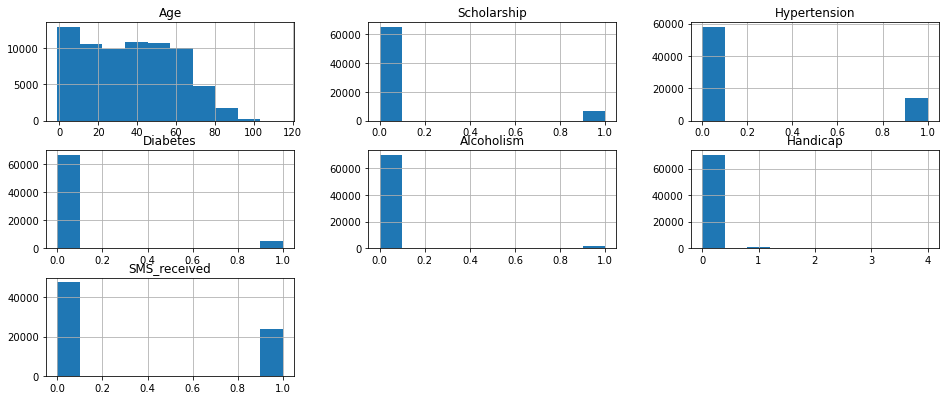

In [15]:
df.hist(figsize=(16, 6.5));

In [16]:
# Dividing the patients into 2 groups based on Show or Not_show
show = df.No_show =='No'
noshow = df.No_show =='Yes'
df[show].count(), df[noshow].count()


(Gender           54154
 Age              54154
 Neighbourhood    54154
 Scholarship      54154
 Hypertension     54154
 Diabetes         54154
 Alcoholism       54154
 Handicap         54154
 SMS_received     54154
 No_show          54154
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handicap         17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [17]:
# let' calculate the mean of show and no show
df[show].mean(), df[noshow].mean()

# Mean Age of show is 37 and noshow is 34 they have also received more SMS than show patients

(Age             37.228460
 Scholarship      0.091332
 Hypertension     0.202940
 Diabetes         0.072866
 Alcoholism       0.023599
 Handicap         0.020903
 SMS_received     0.297226
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handicap         0.017777
 SMS_received     0.453094
 dtype: float64)

In [18]:
df.No_show[df['No_show'] == 'Yes']='1'
df.No_show[df['No_show']== 'No']= '0'
df['No_show'] = pd.to_numeric(df['No_show'])

<ipython-input-18-8b27b1b3ac06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes']='1'
<ipython-input-18-8b27b1b3ac06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show']== 'No']= '0'


In [19]:
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

Making an histogram to see the relation between the (age,alcoholic people, SMS recievers, Gender, Scholarship) and the people who came to their appointment¶


In [20]:
df.Age[showed].mean()

37.228459578239836

In [21]:
df.Age[not_showed].mean()

34.37626677234898

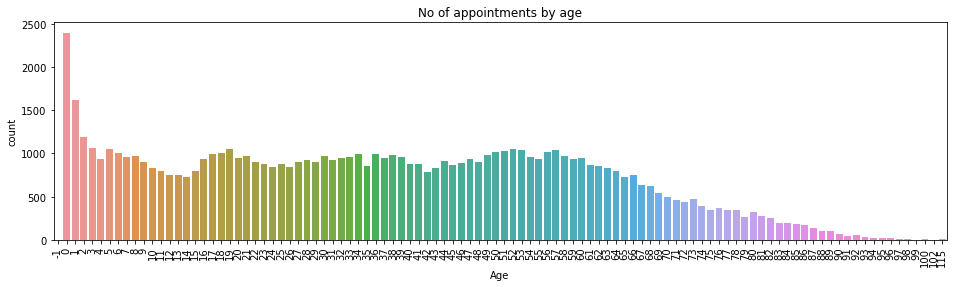

In [43]:
# Let's see how many there are patients of each age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = snb.countplot(x=df.Age) 
ax.set_title("No of appointments by age")
plt.show()
    
    
   

#### The above histogram shows a peak for the infants (patients of age 0). For higher age values the distribution starts to be uniform. After the age value of around 60 we see a right-skewed distribution.

1 - Are no-show appointments associated with a certain gender?

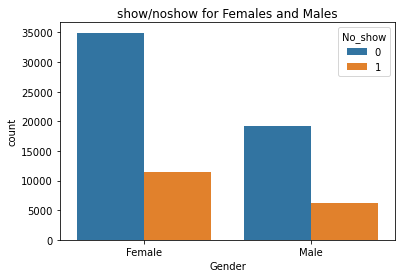

In [23]:
ax = snb.countplot(x=df.Gender,hue=df.No_show,data=df)
ax.set_title("show/noshow for Females and Males")
x_ticks_labels =["Female", "Male"]
ax.set_xticklabels(x_ticks_labels)
plt.show()


We can see that of the 88.000 patients that aprouved about 57.000 were female and 31.000 were male of the 22.500 Patients who did not come for a visit about 15.000 were females and 7500 were males. The ratio of females to males who attended appears to be the same as that which did not come to visit and therefore gender does not affect.  

2 - Does Scholarships Affect ?

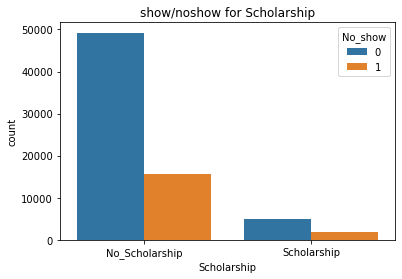

In [24]:
ax = snb.countplot(x=df.Scholarship,hue=df.No_show,data=df)
ax.set_title("show/noshow for Scholarship")
x_ticks_labels =["No_Scholarship", "Scholarship"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

From visualisation we can see that there are around 110000 patients without scholarship and out of them around 80% have come for the visit out of the 10000 patients withe scholarship around 75% of them have come for the visit.

3 - Are chronic illnesses like hypertension affecting patient's absences?

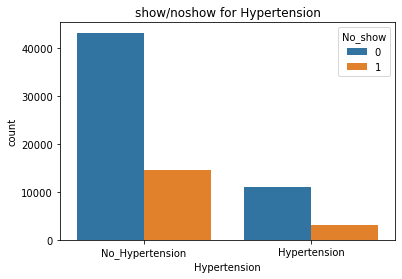

In [25]:
ax = snb.countplot(x=df.Hypertension,hue=df.No_show,data=df)
ax.set_title("show/noshow for Hypertension")
x_ticks_labels =["No_Hypertension", "Hypertension"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the visualisation we can see that about 88000 patients suffering from high blood pressure and about 78% of them attended the visit of 21801 patients with no high blood pressure about 85% came to visit.

4 - is alcoholisme has affect the visit ?

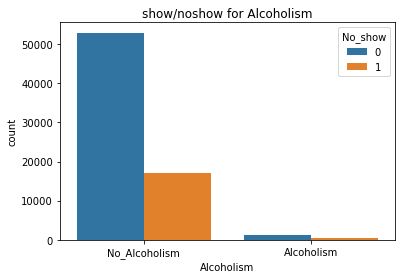

In [26]:
ax = snb.countplot(x=df. Alcoholism,hue=df.No_show,data=df)
ax.set_title("show/noshow for Alcoholism")
x_ticks_labels =["No_Alcoholism", "Alcoholism"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the visualisation we can see that there are about 107000 patients who do not suffer from alcoholism and about 80% of them attended the visit of the 3360 patients with alcohol adiction about 80% attended the visit. 

5 - Do SMS reminders decrease the number of absences?

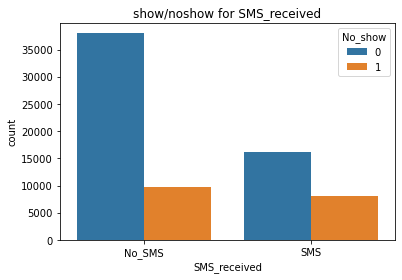

In [27]:
ax = snb.countplot(x=df.SMS_received,hue=df.No_show,data=df)
ax.set_title("show/noshow for SMS_received")
x_ticks_labels =["No_SMS", "SMS"]
ax.set_xticklabels(x_ticks_labels)
plt.show()

Trought the visualisation we can see that there about 75000 patients who did not receive text message and about 84% of them attended the visit of the 35000 patients who received text messages about 72% attended the visit.

<a id='conclusions'></a>
## Conclusions

• We can see sending an SMS for the appointment is not neccessary the right option to make sure that the patient will come, also the Age is the most important factor that decided if a patient would come or not the average of age for people who will be most likely to show up is 39.07518726482 , and the average age for people who are not likely to show up is 35.329151291512915.

• As we can see most of people who has Scholarships are most likely to miss their appointements.

• The features such as different gender or alcoholic is not a factor to decide if the person would come to his appointement or not.

# Limitations
No clear correlations between showing and gender, chronic diseases.
